In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [3]:
IMAGE_SIZE = [224, 224]

train_path = 'dataset/train'
valid_path = 'dataset/test'

In [7]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 134s 2us/step


In [8]:
for layer in inception.layers:
    layer.trainable = False

In [2]:
folders = glob('dataset/train/*')
len(folders)

3

In [10]:
x = Flatten()(inception.output)

In [11]:

prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [12]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [13]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
training_set = train_datagen.flow_from_directory('dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1722 images belonging to 3 classes.


In [16]:

test_set = test_datagen.flow_from_directory('dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 405 images belonging to 3 classes.


In [17]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

D:\ana\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
54/54 [==============================] - 145s 3s/step - loss: 1.2994 - accuracy: 0.8293 - val_loss: 0.8430 - val_accuracy: 0.8568
Epoch 2/20
54/54 [==============================] - 139s 3s/step - loss: 0.3175 - accuracy: 0.9332 - val_loss: 0.5190 - val_accuracy: 0.9062
Epoch 3/20
54/54 [==============================] - 146s 3s/step - loss: 0.1668 - accuracy: 0.9652 - val_loss: 0.4756 - val_accuracy: 0.9086
Epoch 4/20
54/54 [==============================] - 167s 3s/step - loss: 0.1988 - accuracy: 0.9611 - val_loss: 0.4112 - val_accuracy: 0.9210
Epoch 5/20
54/54 [==============================] - 133s 2s/step - loss: 0.1982 - accuracy: 0.9623 - val_loss: 1.5445 - val_accuracy: 0.8469
Epoch 6/20
54/54 [==============================] - 127s 2s/step - loss: 0.1914 - accuracy: 0.9646 - val_loss: 0.9466 - val_accuracy: 0.8914
Epoch 7/20
54/54 [==============================] - 132s 2s/step - loss: 0.1904 - accuracy: 0.9686 - val_loss: 0.8856 - val_accuracy: 0.8889
Epoch 8/20
54

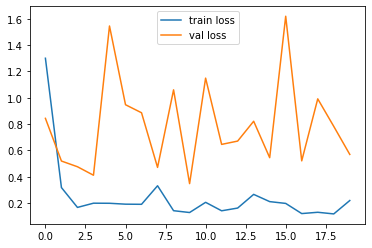

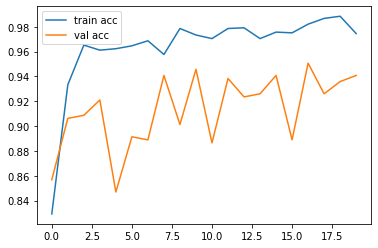

<Figure size 432x288 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [20]:
from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [21]:
y_pred = model.predict(test_set)
y_pred

array([[2.6677395e-23, 1.0000000e+00, 9.8141775e-24],
       [3.0815236e-36, 6.2594339e-14, 1.0000000e+00],
       [1.0000000e+00, 8.1648015e-19, 6.4046355e-36],
       ...,
       [1.0000000e+00, 1.9107667e-08, 7.9713777e-11],
       [0.0000000e+00, 7.0848809e-28, 1.0000000e+00],
       [3.1316239e-13, 9.9999106e-01, 8.9348978e-06]], dtype=float32)

In [22]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [23]:
y_pred


array([1, 2, 0, 2, 0, 1, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 1, 2, 1, 2, 0, 0,
       1, 1, 0, 2, 2, 1, 0, 2, 2, 1, 2, 0, 2, 2, 1, 1, 0, 0, 0, 0, 2, 1,
       0, 1, 0, 1, 0, 1, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 1, 2, 0, 0, 2, 0, 0, 1, 1,
       2, 1, 1, 1, 0, 2, 0, 1, 0, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 0, 2, 2,
       0, 2, 1, 1, 1, 0, 0, 1, 2, 2, 2, 2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1,
       2, 1, 1, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 1, 1, 2, 0, 1, 1, 2, 1, 2,
       0, 0, 1, 2, 1, 2, 2, 0, 0, 0, 1, 1, 1, 2, 1, 2, 2, 0, 1, 2, 2, 1,
       1, 0, 2, 1, 2, 2, 2, 2, 2, 1, 1, 0, 1, 0, 2, 0, 1, 2, 0, 1, 2, 2,
       2, 1, 0, 0, 1, 1, 2, 2, 1, 1, 1, 0, 2, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       2, 2, 1, 0, 2, 2, 1, 2, 0, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 2,
       1, 0, 2, 2, 1, 0, 2, 0, 1, 1, 2, 1, 1, 1, 0, 1, 2, 0, 2, 2, 0, 0,
       2, 1, 2, 0, 0, 1, 0, 1, 2, 1, 1, 0, 2, 0, 0, 2, 2, 1, 2, 2, 0, 1,
       1, 1, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 1, 1,

In [32]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [33]:
model=load_model('model_inception.h5')

In [166]:
#testing the images
img=image.load_img('dataset/test/dme/1033-dme.tif',target_size=(224,224))

In [167]:

x=image.img_to_array(img)
x

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[  0.,   0.,   0.],
        [ 16.,  16.,  16.],
        [ 18.,  18.,  18.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[  0.,   0.,   0.],
        [  9.,   9.,   9.],
        [ 28.,  28.,  28.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[ 22.,  22.,  22.],
        [  8.,   8.,   8.],
        [ 15.,  

In [168]:
x.shape

(224, 224, 3)

In [169]:
x=x/255

In [170]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [171]:
predictions=model.predict(img_data)
predictions

array([[0.28309786, 0.01420799, 0.7026941 ]], dtype=float32)

In [172]:
classes = np.argmax(predictions, axis = 1)
print(classes)

[2]
